In [1]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

# save_path = r"C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results"

def corri(feature, left_video, right_video, left_sensor, right_sensor):
    
    # Now combine the left and right stance arrays into the combined arrays
    combined_video = np.concatenate([left_video, right_video])
    combined_sensor = np.concatenate([left_sensor, right_sensor])
    
    # Calculate Pearson's correlation coefficient
    corr_coefficient, _ = pearsonr(combined_video, combined_sensor)
    
    print(f"Pearson correlation coefficient: {corr_coefficient}")
    
    # Create the scatter plot with different colors for left and right
    plt.scatter(left_sensor, left_video, color='blue', label='Left', alpha=0.5)
    plt.scatter(right_sensor, right_video, color='red', label='Right', alpha=0.5)
    # Compute the overall MIN and MAX correctly
    MIN = min(left_sensor.min(), right_sensor.min(), left_video.min(), right_video.min()) * 0.9
    MAX = max(left_sensor.max(), right_sensor.max(), left_video.max(), right_video.max()) * 1.1
    plt.plot([MIN, MAX], [MIN, MAX], color='red', linestyle='--', label="x = y")
    
    # Labeling the plot
    plt.title(f"Scatter Plot of video vs sensor \nPearson Correlation in {feature}: {corr_coefficient:.2f}")
    plt.xlabel('Sensor')
    plt.ylabel('Video')
    
    plt.xlim(MIN, MAX)
    plt.ylim(MIN, MAX)
    
    # Add a legend
    plt.legend()

    # if save_path:
    #     filename = f"{feature}_correlation_plot.png"
    #     full_path = os.path.join(save_path, filename)
    #     plt.savefig(full_path, dpi=300)
    #     print(f"Figure saved to: {full_path}")
            
    # Show the plot
    plt.show()


def corrisingle(feature, video, sensor):

    # Calculate Pearson's correlation coefficient
    corr_coefficient, _ = pearsonr(video, sensor)
    
    print(f"Pearson correlation coefficient: {corr_coefficient}")
    
    # Create the scatter plot with different colors for left and right
    plt.scatter(sensor, video, color='blue', alpha=0.5)
    # Compute the overall MIN and MAX correctly
    MIN = min(sensor.min(), video.min()) * 0.9
    MAX = max(sensor.max(), video.max()) * 1.1
    plt.plot([MIN, MAX], [MIN, MAX], color='red', linestyle='--', label="x = y")
    
    
    # Labeling the plot
    plt.title(f"Scatter Plot of video vs sensor \nPearson Correlation in {feature}_combined: {corr_coefficient:.2f}")
    plt.xlabel('Sensor')
    plt.ylabel('Video')
    
    plt.xlim(MIN, MAX)
    plt.ylim(MIN, MAX)
    
    # Add a legend
    plt.legend()

    # if save_path:
    #     filename = f"{feature}_combined_correlation_plot.png"
    #     full_path = os.path.join(save_path, filename)
    #     plt.savefig(full_path, dpi=300)
    #     print(f"Figure saved to: {full_path}")
            
    # Show the plot
    plt.show()

In [4]:
import pandas as pd

# Read the first Excel file
df_sensor = pd.read_excel(r"C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\large model\gait_analysis_results_sensor.xlsx")

# Read the second Excel file
df_avg = pd.read_excel(r"C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\large model\gait_analysis_results_video.xlsx")

leftright_columns_of_interest = [
    'avg_stancetime_left',
    'avg_stancetime_right',
    'avg_swingtime_left',
    'avg_swingtime_right',
    'avg_steptime_left',
    'avg_steptime_right',
    'avg_steplength_left',
    'avg_steplength_right'
]

combined_columns_of_interest = ['avg_stancetime', 'avg_swingtime', 'avg_doublesupporttime', 'avg_steptime',
       'avg_steplength', 'avg_velocity', 'avg_cadence']

leftright_column_indexes = [df_sensor.columns.get_loc(col) for col in leftright_columns_of_interest][0::2]
combined_column_indexes = [df_sensor.columns.get_loc(col) for col in combined_columns_of_interest]


### find specific files
# for large model to remove below files
# sensorproblem
indices_sensorproblem = df_sensor['avg_steplength_left'][df_sensor['avg_steplength_left'] > 1].index.tolist()  ## VAL005

# fastwalker 
condition = (df_avg['avg_doublesupporttime'] > 0.255) & (df_sensor['avg_doublesupporttime'] < 0.195)
fastwalker_indices = df_avg['avg_doublesupporttime'][condition].index.tolist()   ## some trials of VAL007 and VAL013, and val024

Pearson correlation coefficient: 0.9545879008546572


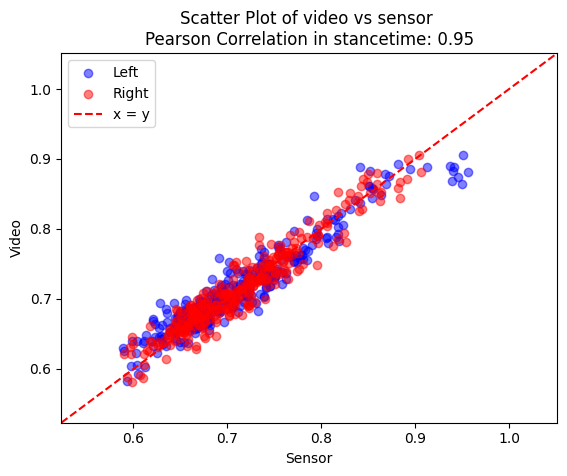

Pearson correlation coefficient: 0.8110225550572344


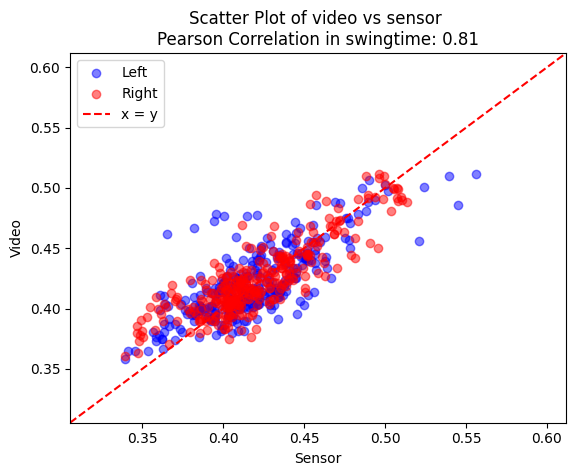

Pearson correlation coefficient: 0.9343814676278188


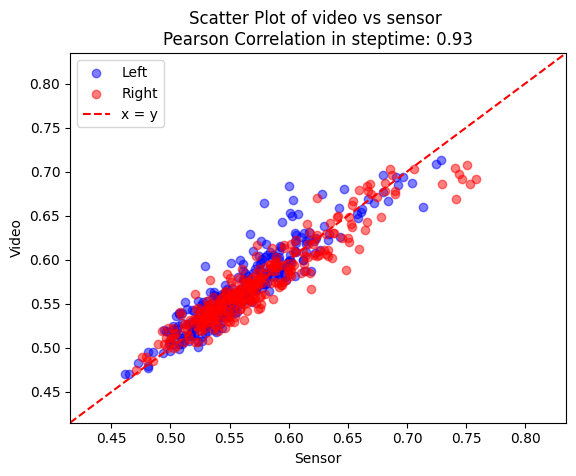

Pearson correlation coefficient: 0.6526221984701596


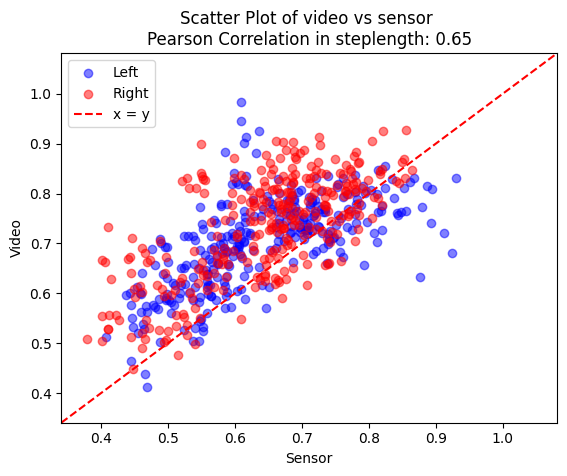

In [5]:
indices = leftright_column_indexes  # Specific indices

# # Define indices to remove
# large model outlier
indices_to_remove = set(indices_sensorproblem + fastwalker_indices) 

for i in indices:
    left_video = df_avg.iloc[:, i]  
    right_video = df_avg.iloc[:, i + 1]
    left_sensor = df_sensor.iloc[:, i]
    right_sensor = df_sensor.iloc[:, i + 1]
   
    # Remove specified indices from left_video, right_video, left_sensor, and right_sensor
    mask_left_video = ~left_video.index.isin(indices_to_remove)
    mask_right_video = ~right_video.index.isin(indices_to_remove)
    mask_left_sensor = ~left_sensor.index.isin(indices_to_remove)
    mask_right_sensor = ~right_sensor.index.isin(indices_to_remove)

    # Apply the mask to remove the specified indices
    filtered_left_video = left_video[mask_left_video]
    filtered_right_video = right_video[mask_right_video]
    filtered_left_sensor = left_sensor[mask_left_sensor]
    filtered_right_sensor = right_sensor[mask_right_sensor]
   
    feature = df_sensor.columns[i].split("_")[1]
    corri(feature, filtered_left_video, filtered_right_video, filtered_left_sensor, filtered_right_sensor)

In [8]:
len(indices_to_remove)

46

Pearson correlation coefficient: 0.9699881531794772


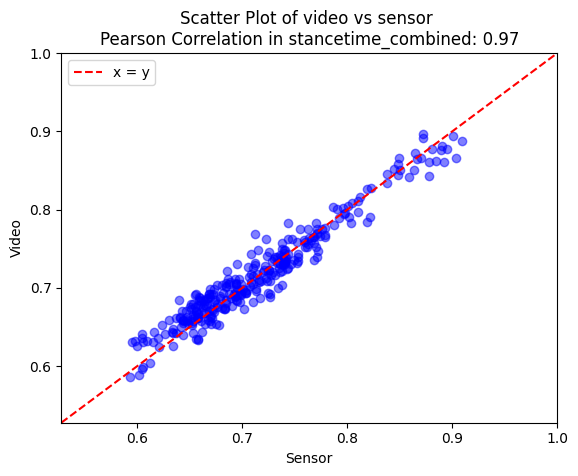

Pearson correlation coefficient: 0.8619478381743281


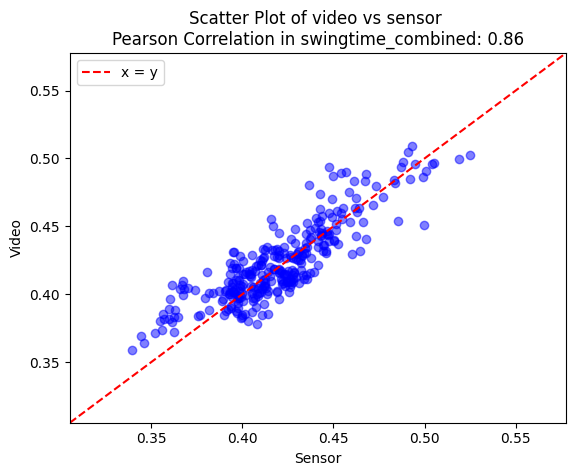

Pearson correlation coefficient: 0.7779136350334448


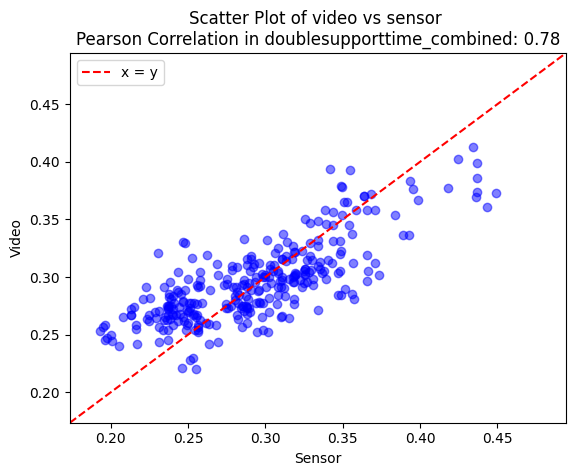

Pearson correlation coefficient: 0.9972243090070757


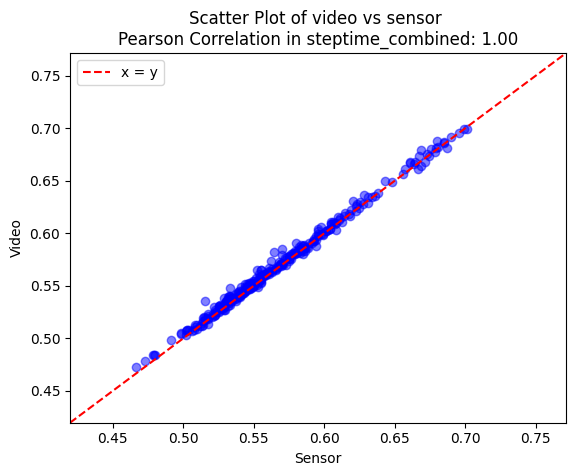

Pearson correlation coefficient: 0.8518310179444143


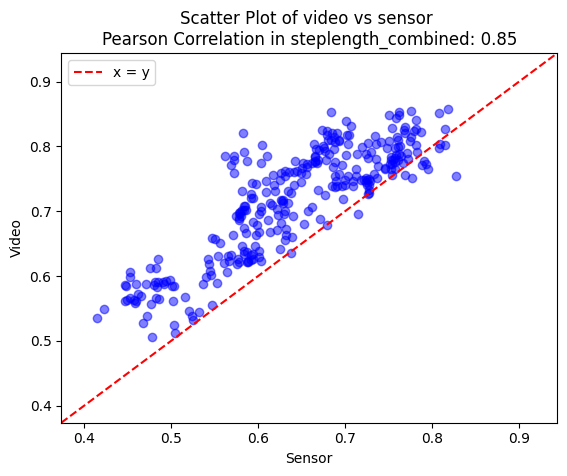

Pearson correlation coefficient: 0.8965261172498615


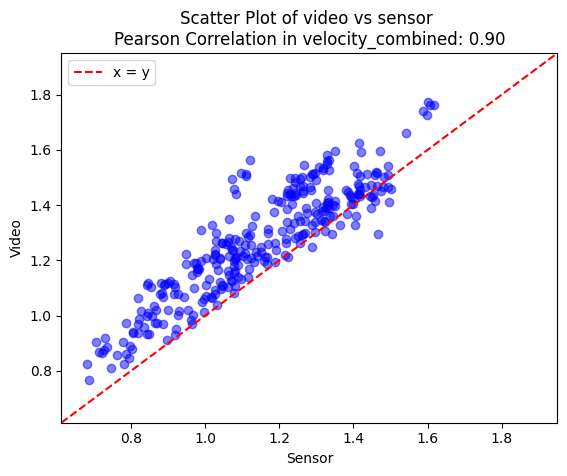

Pearson correlation coefficient: 0.9965706314004246


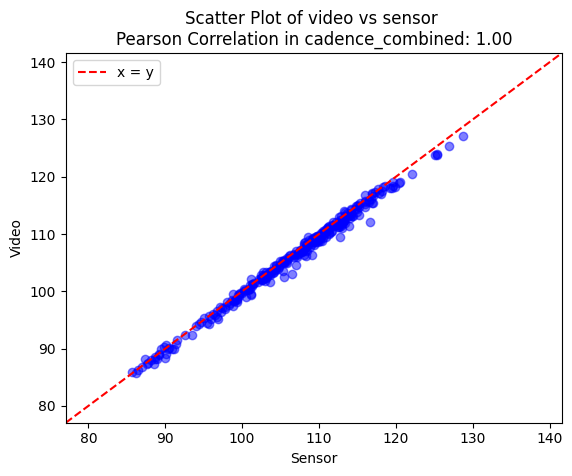

In [6]:
indices = combined_column_indexes # Specific indices

for i in indices:
    video = df_avg.iloc[:, i]  
    sensor = df_sensor.iloc[:, i]

    # Remove specified indices from left_video, right_video, left_sensor, and right_sensor
    mask_video = ~video.index.isin(indices_to_remove)
    mask_sensor = ~sensor.index.isin(indices_to_remove)
    
    # Apply the mask to remove the specified indices
    filtered_video = video[mask_video]
    filtered_sensor = sensor[mask_sensor]
    
    feature = df_sensor.columns[i].split("_")[1]
    corrisingle(feature, filtered_video, filtered_sensor)